In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open("out_ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8.json") as json_file:
    data = json.load(json_file)
with open("out_TTToSemiLeptonic_TuneCP5_PSweights_13TeV-powheg-pythia8.json") as json_file:
    data.update(json.load(json_file))

print(data)

{'hist_ttHTobb_njets': {'contents': [0.0, 0.0, 0.0, 0.0, 206.429443359375, 248.6129608154297, 187.9788055419922, 86.24109649658203, 38.51087951660156, 11.42560863494873, 3.1878468990325928, 0.2462061494588852, 0.31305819749832153, 0.0, 0.0, 0.0, 0.0, 0.0], 'contents_w2': [0.0, 0.0, 0.0, 0.0, 37.0977783203125, 44.70878219604492, 33.71517562866211, 15.31185245513916, 7.050435543060303, 1.923933982849121, 0.5801969766616821, 0.06061746925115585, 0.05080549418926239, 0.0, 0.0, 0.0, 0.0, 0.0], 'edges': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]}, 'hist_ttHTobb_leading_jet_pt': {'contents': [0.0, 0.0, 0.0, 0.0, 0.0, 1.2622389793395996, 7.744820594787598, 18.78314781188965, 31.72894859313965, 38.88352584838867, 55.46992492675781, 52.39412307739258, 56.61288833618164, 50.64152908325195, 53.47630310058594, 45.473907470703125, 41.05550003051758, 32.77579879760742, 31.868675231933594, 28.816627502441406, 23.169750213623047, 21.53803634

In [3]:
var_names = {
    "nbtags": "Number of b tagged jets",
    "njets" : "Number of jets",
    "leading_jet_pt" : "leading jet pt [GeV]",
    "genWeights" : "genWeights",
    "nElectrons" : "number of electrons",
    "nMuons" : "number of muons"
}

processes = ["ttHTobb", "ttbb", "tt2b","ttlf","ttb", "ttcc"]
#processes = ["ttHTobb"]

process_names = {
    "ttHTobb" : "tt+H(bb)",
    "ttbb" : "tt+bb",
    "tt2b" : "tt+2b",
    "ttb" : "tt+b",
    "ttcc" : "tt+c",
    "ttlf" : "tt+light",
    
}

In [4]:
def histogram_dataset(var, data, name, bottom):
    
    bins = data[var]["edges"][:-1]
    counts = data[var]["contents"]
    yerr = data[var]["contents_w2"]
    
    integral = sum(counts)
    width = bins[0] - bins[1]
    
    hist = plt.bar(bins, counts, width=width, bottom=bottom, align="center", label=name + " ({0})".format(round(integral, 2)))
    #hist = plt.bar(bins, counts, yerr=yerr, width=width, align="center", label=dataset + " ({0})".format(round(integral, 2)))
    
    return plt.bar, counts

In [5]:
def plot_histogram(var, processes, data):
    
    bottom = None
    
    for p in processes:
        _, counts = histogram_dataset("hist_" + p + "_" + var, data, process_names[p], bottom)
        if processes.index(p) == 0:
            bottom = [0.0 for c in counts]
        bottom = [sum(x) for x in zip(bottom, counts)]
        
    plt.legend()
    if var == "njets" or var == "nbtags":
        plt.yscale('log')
    plt.xlabel(var_names[var])
    plt.show()

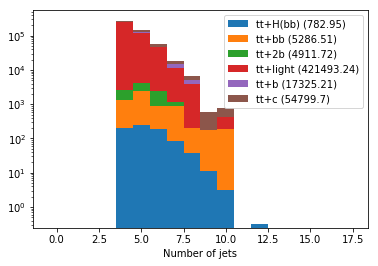

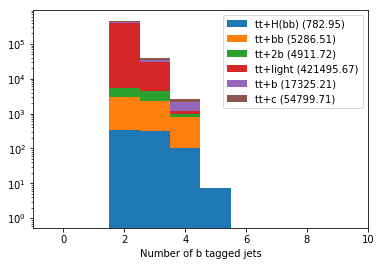

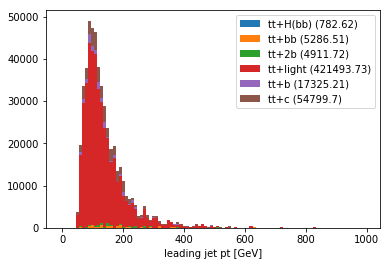

In [6]:
plot_histogram("njets", processes, data)
plot_histogram("nbtags", processes, data)
plot_histogram("leading_jet_pt", processes, data)